In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [6]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [8]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


In [9]:
#Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [13]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [14]:
#Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.659120,-0.313004,-0.329720,0.701060,0.502747,0.393587,0.630473,0.476795,0.565026,0.299316
RH,-0.659120,1.000000,0.312190,0.245762,-0.670875,-0.399709,-0.227840,-0.703401,-0.346836,-0.491651,-0.435075
Ws,-0.313004,0.312190,1.000000,0.160958,-0.227260,-0.019928,0.045396,-0.017229,0.004554,-0.120561,-0.198738
Rain,-0.329720,0.245762,0.160958,1.000000,-0.555931,-0.275293,-0.287197,-0.348926,-0.285114,-0.390323,-0.046784
FFMC,0.701060,-0.670875,-0.227260,-0.555931,1.000000,0.592479,0.493368,0.746844,0.575405,0.782283,0.237565
DMC,0.502747,-0.399709,-0.019928,-0.275293,0.592479,1.000000,0.882414,0.679640,0.984318,0.583017,0.205296
DC,0.393587,-0.227840,0.045396,-0.287197,0.493368,0.882414,1.000000,0.513896,0.949592,0.485008,-0.085764
ISI,0.630473,-0.703401,-0.017229,-0.348926,0.746844,0.679640,0.513896,1.000000,0.637470,0.742329,0.288159
BUI,0.476795,-0.346836,0.004554,-0.285114,0.575405,0.984318,0.949592,0.637470,1.000000,0.567145,0.100737
Classes,0.565026,-0.491651,-0.120561,-0.390323,0.782283,0.583017,0.485008,0.742329,0.567145,1.000000,0.200545


<AxesSubplot: >

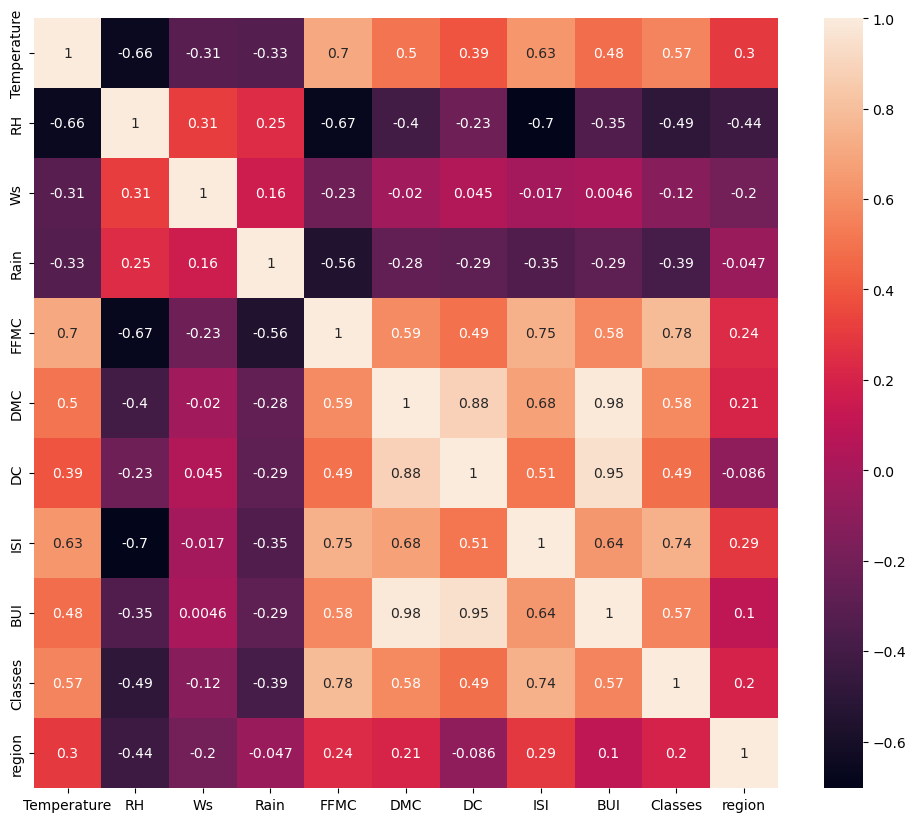

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [16]:
def correlation(dataset,threshold):
    corr_matrix=dataset.corr()
    col_corr=set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [17]:
corr_feature=correlation(X_train,0.85)

In [18]:
#drop feature when correlation is greater than 0.85
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling and Standardisation

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 1.02303642, -0.43660011,  0.86738718, ...,  1.21490928,
         0.84674738, -1.        ],
       [-0.87412283,  1.29836103, -0.48477099, ..., -1.11490029,
        -1.18098977,  1.        ],
       [ 0.48099092, -0.22840477,  0.86738718, ...,  0.75380114,
         0.84674738,  1.        ],
       ...,
       [ 0.20996817,  0.25738434, -0.14673145, ..., -0.50817904,
         0.84674738, -1.        ],
       [ 0.48099092,  0.53497813, -0.82281053, ..., -0.21695285,
         0.84674738, -1.        ],
       [-0.06105458, -0.08960788,  0.86738718, ..., -0.65379214,
        -1.18098977, -1.        ]])

## Box plots to understand effect of standard scaler

/tmp/ipykernel_229/3482842443.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


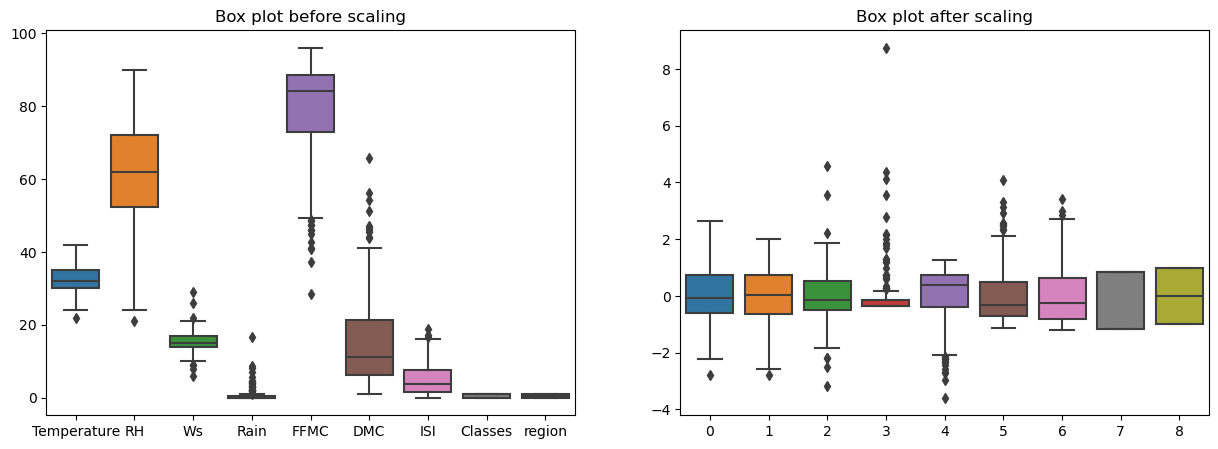

In [21]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Box plot before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("Box plot after scaling")
plt.show()

# Linear Regression Model

Mean absolute error 0.7080454340692297
R2 Score 0.9813991246626835


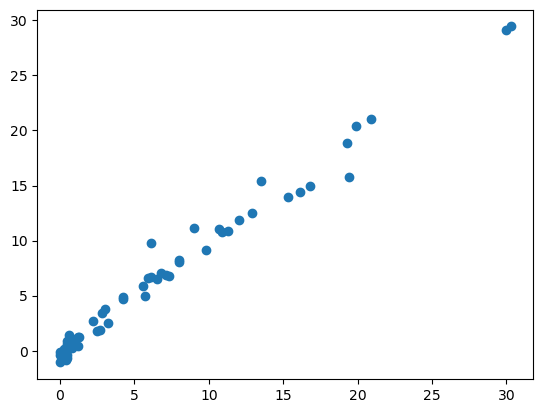

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Lasso Regression

Mean absolute error 1.1626665590574765
R2 Score 0.9524019216349232


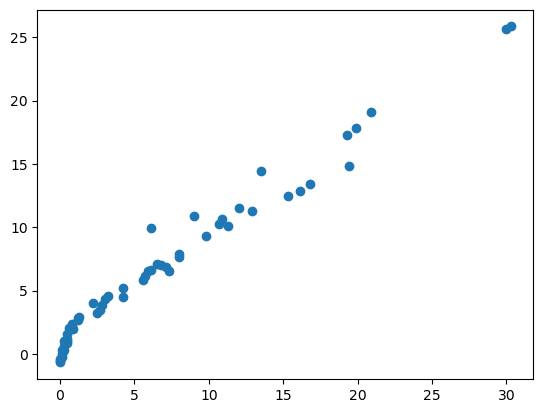

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [24]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.6892696532650793
R2 Score 0.9814799610615288


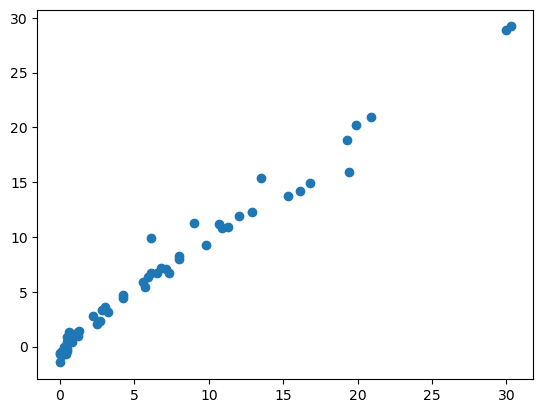

In [25]:
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7285821514895964
R2 Score 0.9807982726897481


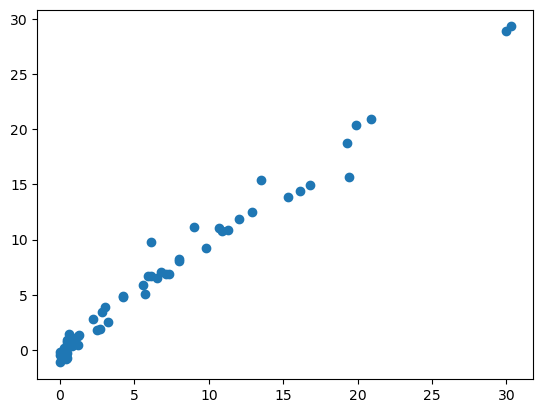

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rid=Ridge()
rid.fit(X_train_scaled,y_train)
y_pred=rid.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7285821514895964
R2 Score 0.9807982726897481


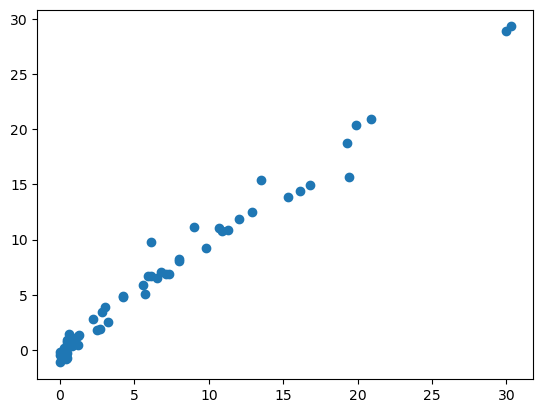

In [27]:
from sklearn.linear_model import RidgeCV
ridcv=RidgeCV(cv=5)
ridcv.fit(X_train_scaled,y_train)
y_pred=ridcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.7839900020995938
R2 Score 0.8868096501682265


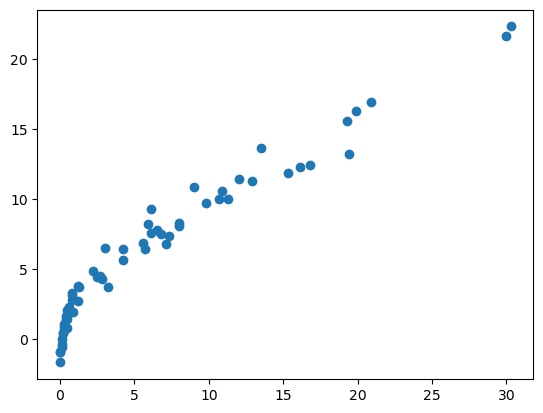

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.778850205817513
R2 Score 0.9789981817166541


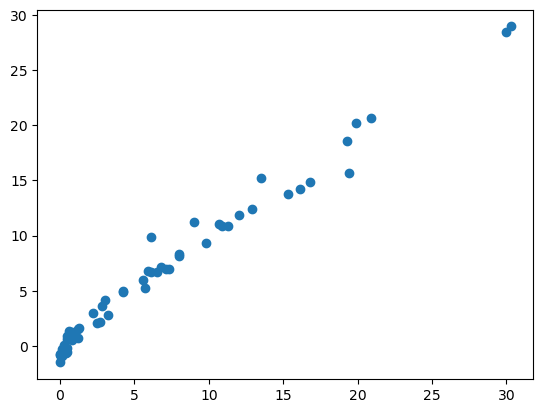

In [33]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [35]:
## Pickle the Machine Learning models, preprocessing model standardscaler

In [36]:
scaler

StandardScaler()

In [39]:
rid

Ridge()

In [40]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rid,open('ridge.pkl','wb'))